# Introduction to mathematical statistics 

Welcome to the lecture 8 in 02403

During the lectures we will present both slides and notebooks. 



In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Example: Skive fjord

     year  month     TN      TP     chla    din     dip    prim  KrIltSv  \
1    1982      1  1.312  0.0887  0.00396  0.415  0.0775  0.0189        0   
2    1982      2  1.371  0.0737  0.00568  0.486  0.0427  0.0895        0   
3    1982      3  1.500  0.0640  0.00200  0.865  0.0245  0.1640        0   
4    1982      4  1.200  0.0450  0.01300  0.588  0.0045  0.7290        0   
5    1982      5  0.772  0.0862  0.04325  0.072  0.0098  3.4730        2   
..    ...    ...    ...     ...      ...    ...     ...     ...      ...   
296  2006      8  0.975  0.3410  0.02043  0.361  0.2480  2.7933        9   
297  2006      9  1.018  0.2362  0.02934  0.293  0.1444  3.8355        2   
298  2006     10  0.661  0.1375  0.01579  0.198  0.0772  1.0872        5   
299  2006     11  0.833  0.0583  0.00226  0.480  0.0307  0.0904        0   
300  2006     12  0.820  0.0703  0.00172  0.590  0.0253  0.0409        0   

     IltSv  IIltSv   N.load  P.load  Q.load   temp      gr  vmp  
1        0       0  2

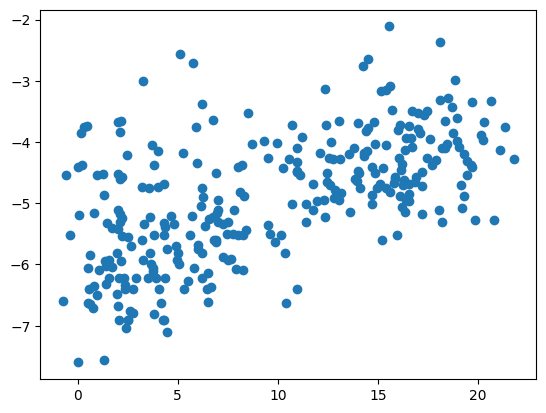

In [30]:
SkiveAvg = pd.read_csv("../week1/skiveAvg.csv", sep=';')
y = np.array(np.log(SkiveAvg["chla"]))
x = np.array(SkiveAvg["temp"])
print(SkiveAvg)
plt.scatter(x,y)

Parameter estimates

In [31]:
Sxx = np.sum((x - np.mean(x)) ** 2)
beta1 = np.sum((y - np.mean(y)) * (x - np.mean(x))) / Sxx
beta0 = np.mean(y) - beta1 * np.mean(x)
np.array([beta0, beta1])

array([-5.82521379,  0.09495466])

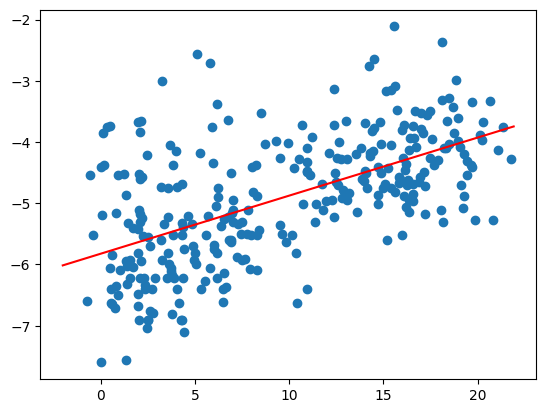

In [32]:
plt.scatter(x,y)
temp_plot = np.arange(-2,22,0.1)
plt.plot(temp_plot,beta0 + beta1 * temp_plot, color = "red")


Standard errors

In [33]:
e = y-beta0- x*beta1
n = len(e)
sigma2 = sum(e ** 2) / (n-2)
sigma = np.sqrt(sigma2)
se_beta0 = sigma * np.sqrt(1/n + np.mean(x)**2/Sxx)
se_beta1 = sigma * np.sqrt(1/Sxx)
np.array([[beta0,se_beta0],[beta1,se_beta1]])

array([[-5.82521379,  0.08811298],
       [ 0.09495466,  0.00771234]])

## Matrix formulation

In [34]:
X = np.array([np.repeat(1,n), x]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y
Sigma_beta = sigma2 * np.linalg.inv(X.T @ X)
se = np.sqrt(Sigma_beta.diagonal())

## Coefficient table
coefTab = np.array([beta,se]).T
col_names = ["Estimates","Std.Error"]
row_names = ["beta0","beta1"]
coefTab = pd.DataFrame(coefTab,columns = col_names, index = row_names)
coefTab



Estimates  Std.Error
beta0  -5.825214   0.088113
beta1   0.094955   0.007712

Include hypothesis tests

In [35]:
t_obs = beta/se
pv = 2*(1-stats.t.cdf(np.abs(t_obs),df=n-1))
## Coefficient table
coefTab = np.array([beta,se,t_obs,pv]).T
col_names = ["Estimates","Std.Error","t_obs","p-value"]
row_names = ["beta0","beta"]
coefTab = pd.DataFrame(coefTab,columns = col_names, index = row_names)
coefTab

Estimates  Std.Error      t_obs  p-value
beta0  -5.825214   0.088113 -66.110732      0.0
beta    0.094955   0.007712  12.312034      0.0

Some confidence intervals 

In [36]:
tq = stats.t.ppf(0.975,df=n-2)
ci_low = beta-se*tq
ci_high = beta+se*tq

## Coefficient table
coefTab = np.array([beta,se,t_obs,pv,ci_low,ci_high]).T
col_names = ["Estimates","Std.Error","t_obs","p-value","ci_low","ci_high"]
row_names = ["beta0","beta"]
coefTab = pd.DataFrame(coefTab,columns = col_names, index = row_names)
coefTab

Estimates  Std.Error      t_obs  p-value    ci_low   ci_high
beta0  -5.825214   0.088113 -66.110732      0.0 -5.998616 -5.651811
beta    0.094955   0.007712  12.312034      0.0  0.079777  0.110132

Confidence and prediction interlals for the line

In [37]:
x0 = np.array([1,10])
y_hat = x0 @ beta
ME_c0 = tq * sigma * np.sqrt(x0 @ np.linalg.inv(X.T @ X) @ x0.T)
ME_p0 = tq * sigma * np.sqrt(1+x0 @ np.linalg.inv(X.T @ X) @ x0.T)

ci0_low = y_hat - ME_c0
ci0_high = y_hat + ME_c0

pi0_low = y_hat - ME_p0
pi0_high = y_hat + ME_p0

print("Conf Int ",np.array([ci0_low,y_hat,ci0_high]))
print("Pred Int ",np.array([pi0_low,y_hat,pi0_high]))

Conf Int  [-4.97160769 -4.87566722 -4.77972675]
Pred Int  [-6.53555203 -4.87566722 -3.21578241]


Plots

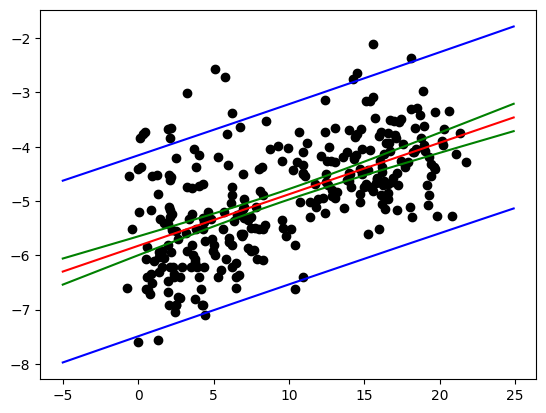

In [38]:
x0 = np.arange(-5,25,0.1)
X0 = np.array([np.repeat(1,len(x0)), x0]).T
y_hat0 = X0 @ beta
V = X0 @ np.linalg.inv(X.T @ X) @ X0.T
y_hatLow_c = y_hat0 - tq * sigma * np.sqrt(V.diagonal())
y_hatHigh_c = y_hat0 + tq * sigma * np.sqrt(V.diagonal())
y_hatLow_p = y_hat0 - tq * sigma * np.sqrt(1+V.diagonal())
y_hatHigh_p = y_hat0 + tq * sigma * np.sqrt(1+V.diagonal())


plt.scatter(x,y,color="black")
plt.plot(x0,y_hat0,color="red")
plt.plot(x0,y_hatLow_c,color="green")
plt.plot(x0,y_hatHigh_c,color="green")
plt.plot(x0,y_hatLow_p,color="blue")
plt.plot(x0,y_hatHigh_p,color="blue")



## Correlation

In [39]:
y_hat = X @ beta
Rsq = 1-np.sum((y-y_hat)**2) / np.sum((y-np.mean(y))**2)
print("R^2",Rsq)
np.corrcoef(x,y)[0,1]


R^2 0.3371682543277057


np.float64(0.5806619105191122)

In [40]:
SkiveAvg["lchla"] = np.log(SkiveAvg["chla"])
fit = smf.ols(formula = "lchla~temp", data = SkiveAvg).fit()
print(fit.summary(fit,slim=True))

                                                               OLS Regression Results                                                              
Dep. Variable:     <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f086d66abc0>   R-squared:                       0.337
Model:                                                                                                 OLS   Adj. R-squared:                  0.335
No. Observations:                                                                                      300   F-statistic:                     151.6
Covariance Type:                                                                                 nonrobust   Prob (F-statistic):           1.94e-28
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8252      0.088    -66.111      0.000      -5.999      -5.652
temp           0.0950  

In [41]:
coefTab

Estimates  Std.Error      t_obs  p-value    ci_low   ci_high
beta0  -5.825214   0.088113 -66.110732      0.0 -5.998616 -5.651811
beta    0.094955   0.007712  12.312034      0.0  0.079777  0.110132

In [42]:
print(Rsq)
print(sigma)
np.sqrt(fit.scale)

0.3371682543277057
0.8420459632272005


np.float64(0.8420459632272006)

## Prediction using Python

In [43]:
new_data = pd.DataFrame({"temp": [5]})
pred = fit.get_prediction(new_data).summary_frame(alpha=0.05)
print(round(pred,2))

   mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0 -5.35     0.06          -5.47          -5.23         -7.01         -3.69


## Multiple linear regression

In [24]:
print(SkiveAvg)

     year  month     TN      TP     chla    din     dip    prim  KrIltSv  \
1    1982      1  1.312  0.0887  0.00396  0.415  0.0775  0.0189        0   
2    1982      2  1.371  0.0737  0.00568  0.486  0.0427  0.0895        0   
3    1982      3  1.500  0.0640  0.00200  0.865  0.0245  0.1640        0   
4    1982      4  1.200  0.0450  0.01300  0.588  0.0045  0.7290        0   
5    1982      5  0.772  0.0862  0.04325  0.072  0.0098  3.4730        2   
..    ...    ...    ...     ...      ...    ...     ...     ...      ...   
296  2006      8  0.975  0.3410  0.02043  0.361  0.2480  2.7933        9   
297  2006      9  1.018  0.2362  0.02934  0.293  0.1444  3.8355        2   
298  2006     10  0.661  0.1375  0.01579  0.198  0.0772  1.0872        5   
299  2006     11  0.833  0.0583  0.00226  0.480  0.0307  0.0904        0   
300  2006     12  0.820  0.0703  0.00172  0.590  0.0253  0.0409        0   

     IltSv  IIltSv   N.load  P.load  Q.load   temp      gr  vmp     lchla  
1        0 

In [44]:
fit2 = smf.ols(formula = "lchla ~ temp + gr", data = SkiveAvg).fit()
print(fit2.summary(fit2,slim=True))

                                                               OLS Regression Results                                                              
Dep. Variable:     <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f081be2c910>   R-squared:                       0.366
Model:                                                                                                 OLS   Adj. R-squared:                  0.362
No. Observations:                                                                                      300   F-statistic:                     85.83
Covariance Type:                                                                                 nonrobust   Prob (F-statistic):           3.83e-30
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8825      0.088    -67.086      0.000      -6.055      -5.710
temp           0.0610  

## Residual Analysis

In [45]:
e = fit2.resid
e1 = e[1:(n-1)]
e2 = np.roll(e,-1)[1:(n-1)]

np.float64(0.3718256130566072)

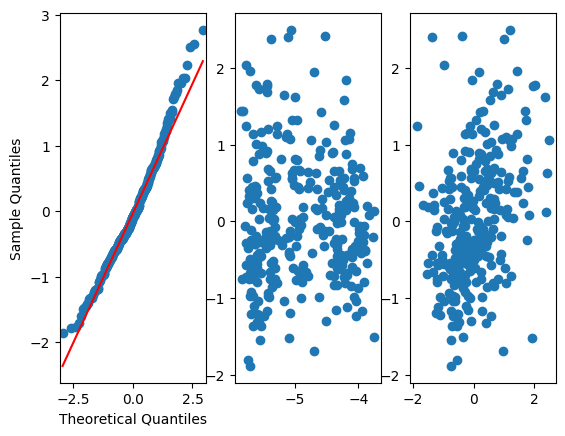

In [46]:
fig, ax = plt.subplots(1,3)
sm.qqplot(fit.resid, line="q", a=1/2, ax=ax[0])
ax[1].scatter(fit2.fittedvalues, fit2.resid)
ax[2].scatter(e1, e2)
np.corrcoef(e1,e2)[0,1]

## Extra if time

In [28]:
fitTemp = smf.ols(formula = "temp ~ year", data = SkiveAvg).fit()
print(fitTemp.summary(fitTemp,slim=True))

                                                               OLS Regression Results                                                              
Dep. Variable:     <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f08208d0b20>   R-squared:                       0.000
Model:                                                                                                 OLS   Adj. R-squared:                 -0.003
No. Observations:                                                                                      300   F-statistic:                    0.1414
Covariance Type:                                                                                 nonrobust   Prob (F-statistic):              0.707
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.4290    100.949     -0.282      0.778    -227.093     170.235
year           0.0190  